# Create Dataframe Using Miocic et al. Data

WHEN WORKING ON AGAIN, REFORMAT TO GO COLUMN BY COLUMN AND DESCRIBE METHODS ETC. USE AVISO AS A REFERENCE FOR WHAT THEY DID.

This notebook contains the complete workthrough for creating the dataframe **miocic**, which is used primarily to [answer subquestion 1], and is expanded on to [answer sq 3]. This is a separate notebook to separate the data cleaning and data engineering methods used from the machine learning aspects.
# Import Necessary Packages

In [227]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Read in Miocic Data

In [177]:
miocic = pd.read_csv('miocic_database.csv')

In [178]:
miocic.head()

,Name,No,Depth_min,Depth_max,T_min,T_max,P_min,P_max,CO2_min,CO2_max,...,Reservoir,Reservoir thickness (Gross),Reservoir Thickness Net,Seal,Seal thickness,Stacked resevoirs,No. of stacked reservoirs,Literature,Well log & pressure,Offshore
0,Jackson Dome,1,4660.0,NaN,150.0,NaN,NaN,NaN,70.00,90.0,...,Carbonates; Sandstones,NaN,NaN,Mudstones,NaN,NaN,NaN,"Stevens et al., 2001; Stuart&Kosik, 1977; Rice...",NaN,No
1,El Trapial Field,10,1234.0,NaN,56.0,NaN,64.0,NaN,74.24,NaN,...,Sandstone,NaN,NaN,NaN,NaN,NaN,NaN,"Blann et al., 1997; Crotti et al, 2007; Orchue...",NaN,No
2,Messokampos,13,NaN,500,25.0,NaN,0.5,NaN,99.50,NaN,...,Sands,260,NaN,Clay,10s,NaN,NaN,"Gaus et al, 2004; TNO poster",NaN,No
3,Budafa Field,24,3200.0,3400,164.0,NaN,295.0,NaN,81.00,NaN,...,Sandstone,100,NaN,?,NaN,Yes,NaN,"Doleschall et al., 1992, Gacho-Muro, 2005 Kira...",NaN,No
4,DF1-1 Field,41,1280.0,1450,70.0,NaN,NaN,NaN,51.00,71.0,...,Sandstones,NaN,NaN,Mudstones,NaN,Yes,3,"Huang et al., 2003, 2004; Zhu et al, 2009, Zhe...",NaN,Yes


# Data Cleaning

In [179]:
miocic.columns

Index(['Name', 'No', 'Depth_min', 'Depth_max', 'T_min', 'T_max', 'P_min ',
       'P_max', 'CO2_min', 'CO2_max', 'Densities', 'Leakage',
       'Leakage pathways', 'Basin Type', 'CO2 source', 'CO2 held for',
       'Size (Tcf)', 'Trapping mechanism', 'Fault bound/sealed?', 'Reservoir',
       'Reservoir thickness (Gross)', 'Reservoir Thickness Net', 'Seal',
       'Seal thickness', 'Stacked resevoirs', 'No. of stacked reservoirs',
       'Literature', 'Well log & pressure ', 'Offshore'],
      dtype='object')

In [180]:
miocic.describe()

,No,Depth_min,T_min,T_max,P_min,CO2_min,CO2_max,Densities,Basin Type,Reservoir Thickness Net
count,61.000000,60.000000,58.000000,18.000000,31.000000,52.000000,25.000000,61.000000,0.0,5.000000
mean,31.000000,2066.195000,85.177534,87.976667,225.774194,82.631731,83.228000,504.273770,NaN,26.800000
std,17.752934,1035.096305,36.940722,38.054862,162.733135,17.850647,17.489813,219.883799,NaN,14.446453
min,1.000000,375.000000,20.000000,32.920000,0.500000,20.000000,42.900000,0.900000,NaN,12.000000
25%,16.000000,1268.500000,56.375000,59.750000,77.900000,71.587500,77.000000,381.400000,NaN,21.000000
50%,31.000000,2012.000000,85.500000,87.142500,209.000000,90.000000,90.000000,549.000000,NaN,21.000000
75%,46.000000,2764.000000,100.300000,104.625000,292.500000,97.000000,97.050000,656.900000,NaN,30.000000
max,61.000000,4660.000000,200.000000,165.000000,620.000000,99.700000,99.500000,919.300000,NaN,50.000000


In [181]:
miocic.set_index('Name', inplace=True)

Here, I reset the index to the name of the basin.

## Drop Columns
The first part in data cleaning is removing unnessecary or useless columns. Here, I outline all of the columns that I delete and the reasoning. Overall, columns are dropped if they contain information not relevant to modelling potential carbon storage sites or if they are missing more than 50% of the data. 

- 'No' is used to number the basins and is therefore not relevant to the model.
- 'CO2 min' describes the minimum amount of CO2 stored. Since this data isn't an intrinsic part of potential sites for carbon injection, it is not relevant
- 'CO2 max' describes the maximum amount of CO2 stored. For the same reason as 'CO2 min,' it is not relevant. 
- 'Leakage pathways' has data only for insecure basins and therefore not relevant to the model so it is dropped.
- 'Basin type' does not have any data, so it is dropped.
- 'CO2 source' is not relevant to potential sites for carbon injection and is therefore not relevant to the model.
- 'CO2 held for' is not relevant to potential sites for carbon injection and is therefore not relevant to the model.
- 'Size (Tcf)' has limited data availability, so it is dropped.
- 'Reservoir Thickness Net' has limited data availability so it is dropped.
- 'No. of stacked reservoirs' has limited data availability, so it is dropped.
- 'Literature' cites the article with the basin information, so it is not relevant to the model.
- 'Well log & pressure' demonstrates if there is well log data information so it is not relevant to the model.

In [182]:
#drop columns
miocic.drop(['No', 'CO2_min', 'CO2_max', 'Leakage pathways', 
            'Basin Type', 'CO2 source', 'CO2 held for', 'Size (Tcf)', 'Reservoir Thickness Net',
            'No. of stacked reservoirs', 'Literature', 'Well log & pressure '
             ], axis=1, inplace=True)

## Convert columns to necessary datatype

In [183]:
miocic.dtypes

Depth_min                      float64
Depth_max                       object
T_min                          float64
T_max                          float64
P_min                          float64
P_max                           object
Densities                      float64
Leakage                         object
Trapping mechanism              object
Fault bound/sealed?             object
Reservoir                       object
Reservoir thickness (Gross)     object
Seal                            object
Seal thickness                  object
Stacked resevoirs               object
Offshore                        object
dtype: object

In [184]:
def str_to_float(col):
    miocic[col] = pd.to_numeric(
        miocic[col]
        .str.strip() 
        .replace(r'[^0-9.-]', '', regex=True), 
        errors= 'coerce'
    )
for col in ['Depth_max', 'P_max', 'Reservoir thickness (Gross)', 'Seal thickness']:
    str_to_float(col)

# Aggregate min/max columns to average

- 'Depth_min' and 'Depth_max' aggregated to become 'Depth'
- 'T_min' and 'T_max' aggregated to become 'Temperature'
- 'P_min' and 'P_max' aggregated to become 'Pressure'

In [185]:
#depth
miocic['Depth'] = miocic[['Depth_min', 'Depth_max']].mean(axis=1, skipna=True)
#temperature
miocic['Temperature'] = miocic[['T_min', 'T_max']].mean(axis=1, skipna=True)
#pressure
miocic['Pressure'] = miocic[['P_min ', 'P_max']].mean(axis=1, skipna=True)
#drop min/max columns
miocic.drop(['Depth_min', 'Depth_max', 'T_min', 'T_max',
            'P_min ', 'P_max'], axis=1, inplace=True)

In [186]:
miocic['Depth'].isna().any()

False

In [187]:
sum(miocic['Temperature'].isna())

3

In [188]:
sum(miocic['Pressure'].isna())

30

In [189]:
sum(miocic['Pressure'].isna())/len(miocic)

0.4918032786885246

After aggregating min and max columns, we are still missing a lot of pressure data.

In [190]:
miocic.head()

,Densities,Leakage,Trapping mechanism,Fault bound/sealed?,Reservoir,Reservoir thickness (Gross),Seal,Seal thickness,Stacked resevoirs,Offshore,Depth,Temperature,Pressure
Name,,,,,,,,,,,,,
Jackson Dome,654.6,No,Structural and salt structures,NaN,Carbonates; Sandstones,NaN,Mudstones,NaN,NaN,No,4660.0,150.0,NaN
El Trapial Field,141.0,No,"Dome, Structural",NaN,Sandstone,NaN,NaN,NaN,NaN,No,1234.0,56.0,64.0
Messokampos,0.9,Yes,Stratigraphic,NaN,Sands,260.0,Clay,10.0,NaN,No,500.0,25.0,0.5
Budafa Field,451.6,No,NaN,NaN,Sandstone,100.0,?,NaN,Yes,No,3300.0,164.0,295.0
DF1-1 Field,378.3,No,Mudstone Diapir,NaN,Sandstones,NaN,Mudstones,NaN,Yes,Yes,1365.0,70.0,NaN


# 'Leakage' Target Variable

In [191]:
#Leakage has 3 options: Yes, No, and Inconclusive. 
#I will deal with the inconclusive sites later, but for now I want to use integers to represent this data
miocic['Leakage']= miocic['Leakage'].str.strip().map(
    {'No': 0, 'Yes': 1, 'Inconclusive': 2}).astype('int')

# Reclassify Features

## Trapping mechanism

In [192]:
miocic['Trapping mechanism'].value_counts()

Trapping mechanism
Structural (fault)                             4
structural, stratigraphic                      4
Mudstone Diapir                                3
Stratigraphic                                  3
Antiform                                       3
Anticline                                      3
Diapir, fault                                  2
Structural                                     2
Structural and salt structures                 1
Dome, Structural                               1
Horst (structural)                             1
Dome Anticline                                 1
Structural stratigraphic                       1
Structural (4 way closure)                     1
Dome                                           1
Anticline, faulted                             1
Anticlinal fold with thrust fault              1
anticline, faulted                             1
Structural/stratigraphic (intrusion bound)     1
Stratigraphic                                  1
S

In [193]:
miocic['Trapping mechanism'].str.contains(r'[Ss]tratigraphic|straticgraphic').value_counts()

Trapping mechanism
False    39
True     13
Name: count, dtype: int64

In [194]:
miocic['Trapping mechanism'].str.contains(r'[Ss]tructural').value_counts()

Trapping mechanism
False    28
True     24
Name: count, dtype: int64

I recategorized 'trapping mechanism' into two categories following Szulczewski et al. (2013): structural and stratigraphic. Unlike traditional one-hot encoding, I also allow for the the trapping mechanism to be both structural and stratigraphic.

<u>Trap mechanisms</u>  
- Structural
    - Fault
    - Diapir
    - Antiform/Anticline
    - Dome
    - Horst
- Stratigraphic
    - Lithological
 
I also create a second level of categorization for sites with Structural Trapping to indicate if it is faulted or an anticline, because these are the most common structural traps in the dataset.

In [195]:
#structural- 24 basins in this category
miocic['Trapmech_structural'] = miocic['Trapping mechanism'].str.contains(
    r'[Ss]tructural|[Dd]ome|[Dd]iapir|[Aa]ntiform|[Aa]nticline|[Hh]orst|[Aa]nticlinal|[Ff]ault') 
#stratigraphic- 12 basins in this category
miocic['Trapmech_stratigraphic'] = miocic['Trapping mechanism'].str.contains(
    r'[Ss]tratigraphic|[Ss]traticgraphic') 

#fault- 17 basins in this category
miocic['Structural_fault'] = miocic['Trapping mechanism'].str.contains(
    r'[Ff]ault') 
#anticline- 14 basins in this category
miocic['Structural_anticline'] = miocic['Trapping mechanism'].str.contains(
    r'[Aa]nticline|[Aa]ntiform') 

In [196]:
#drop 'Trapping mechanism' column
miocic.drop(['Trapping mechanism'], axis=1, inplace=True)

## Fault bound/sealed

For this categorical variable, the data can either be 'yes', 'no', or 'na', which is different from missing a value. I will one-hot encode this variable but I also have to differentiate between 'na' and missing values, since the computer does not differentiate this.

In [197]:
miocic['Fault bound/sealed?'].value_counts()

Fault bound/sealed?
Yes    30
No     14
yes     4
no      3
Name: count, dtype: int64

Currently, this variable is stored as strings and NaN values. I need to standardize the capitalization  before one-hot encoding.

In [198]:
miocic['Fault bound/sealed?'] = miocic['Fault bound/sealed?'].str.lower()
miocic['Fault bound/sealed?'].value_counts()

Fault bound/sealed?
yes    34
no     17
Name: count, dtype: int64

I am using OneHotEncoder from sklearn to one-hot encode this categorical variable.

In [199]:
fault = OneHotEncoder()
fault.fit(miocic[['Fault bound/sealed?']])
fault_columns = pd.DataFrame(fault.transform(miocic[['Fault bound/sealed?']]).toarray(), 
                                  columns=fault.get_feature_names_out(), index=miocic.index)
fault_columns.rename(columns={'Fault bound/sealed?_no': 'Faultbound_no',
                              'Fault bound/sealed?_yes': 'Faultbound_yes',
                              'Fault bound/sealed?_nan': 'Faultbound_nan'}, inplace=True)
#the last two basins have missing data for this variable, so I am manually changing this
fault_columns.iloc[59:, :] = np.nan
#remove a column to maintain linear independence
fault_columns.drop('Faultbound_no', axis=1, inplace=True)

Now that I have created fault_columns, a dataframe of the one-hot encoded feature, I merge this dataframe with the miocic dataframe.

In [200]:
#combine one hot encoded df to miocic
miocic= pd.merge(miocic, fault_columns, left_on='Name', right_on='Name')
miocic = miocic.drop(columns= 'Fault bound/sealed?')

In [201]:
miocic['Faultbound_yes'].isna().sum()

2

## Reservoir

In [202]:
len(miocic['Reservoir'].value_counts().index)
#aviso: Basement, carbonate, dolomite, limestone, sandstone, mixed, sands, volcanics

28

In [203]:
miocic['Reservoir'].value_counts()

Reservoir
Sandstone                                      17
Sandstones                                      7
Carbonates                                      5
Carbonate                                       4
Dolomite                                        2
Carbonates; Sandstones                          2
Sandstone, siltstone                            2
Limestone                                       2
Sandstone, Siltstone, Limestone & Anhydrite     1
Sandstone & Carbonates                          1
Sands                                           1
Limestone; Dolomite                             1
Volcanics, conglomerates                        1
Dolomite, Limestone                             1
Siltstones; Carbonates                          1
Sandstones                                      1
Sandstones; Mudstones                           1
Sandstone & Limestone                           1
Limestones                                      1
Sandstone, Limestone                    

In [204]:
#aviso: Basement, carbonate, dolomite, limestone, sandstone, mixed, sands, volcanics
#my categories: other (basement, sands), sandstones/conglomerates, siltstones/mudstones, carbonites (ites)
miocic['Reservoir'].str.contains(r'Sandstones?|[Mm]udstones?').value_counts()


Reservoir
True     35
False    26
Name: count, dtype: int64

In [205]:
miocic['Reservoir'].str.contains(r'[Ll]imestone').value_counts()

Reservoir
False    51
True     10
Name: count, dtype: int64

In [206]:
miocic['Reservoir'].str.contains(r'[Dd]olomit').value_counts()


Reservoir
False    54
True      7
Name: count, dtype: int64

Following the reservoir differences between sandstone and carbonates demonstrated by Ehrenberg and Nadeau (2005), I recategorize ‘Reservoir’ into three categories: sandstone, carbonates, and other. Rare lithologies (volcanics, basement) are grouped together due to large differences between the other categories. Unlike traditional one-hot encoding, I also allow for the reservoir to fall into multiple categories.

<u>Reservoir</u>  
- Sandstones
    - conglomerates
    - siltstones
    - mudstones
    - sands
- Carbonates
    - limestone
    - dolomites
    - biolithite
- Other
    - Volcanics
    - Basement

I also create a second level of categorization for sites with Carbonate lithology to further subdivide into limestone and dolomites, because these are the most common carbonate lithologies in the dataset.

In [207]:
#Sandstone
miocic['Res_sandstone'] = miocic['Reservoir'].str.contains(
    r'[Ss]ands|[Ss]ilt|[Cc]onglomerate')
#Carbonates
miocic['Res_carbonates'] = miocic['Reservoir'].str.contains(
    r'[Cc]arbonate|[Dd]olomit|[Ll]imestone')
#Other
miocic['Res_other'] = miocic['Reservoir'].str.contains(
    r'[Vv]olcanic|[Bb]asement')

#Carbonates: Limestone
miocic['Carbonate_limestone'] = miocic['Reservoir'].str.contains(
    r'[Ll]imestone')
#carbonates: dolomite
miocic['Carbonate_dolomite'] = miocic['Reservoir'].str.contains(
    r'[Dd]olomit')

In [208]:
#drop 'Reservoir' column
miocic.drop('Reservoir', axis=1, inplace=True)

## Seal

In [209]:
miocic['Seal'].isna().mean()

0.09836065573770492

In [210]:
miocic['Seal'].value_counts()

Seal
Mudstone                                    10
Shale                                        9
Mudstones                                    7
Clay                                         1
Evaporites; Shales                           1
Salt                                         1
?                                            1
Claystone/Siltstone                          1
Anhydrite & claystones                       1
Mudstones; Anhydrite                         1
Thrust deposits                              1
Evaporite, Carbonates                        1
Shale/Clay                                   1
Shale and Siltstones                         1
Halite                                       1
Anhydrite; Mudstones                         1
Marine sediments (mudstones?); Laccolith     1
Shale & Limestone                            1
Evaporites; Mudstones                        1
Shale                                        1
Claystone and Marlstone                      1
Shale, E

Following the geological and sealing capacity distinctions between different seals identified by Grunau (1987), I recategorize the ‘Seal’ feature into into shales, evaporites, and other. 

<u>Seal</u>  
- Shale
    - Mudstone
    - Clay
    - Claystone
- Evaporite
    - Salt
    - Anhydrite
    - Halite
    - Gypsum
- Other
    - Thrust deposits
    - Carbonate
    - Limestone
    - Laccolith
    - Basalt
    - Volcanics

In [212]:
miocic.loc[miocic['Seal']== '?', 'Seal'] = np.nan

#Shale
miocic['Seal_shale'] = miocic['Seal'].str.contains(
    r'[Ss]hale|[Mm]udstone|[Cc]lay')
#Evaporite
miocic['Seal_evaporite'] = miocic['Seal'].str.contains(
    r'[Ee]vaporite|[Ss]alt|[Aa]nhydrite|[Hh]alite|[Gg]ypsum')
#Shale
miocic['Seal_other'] = miocic['Seal'].str.contains(
    r'[Tt]hrust deposits|[Cc]arbonate|[Ll]imestone|[Ll]accolith|[Bb]asalt|[Vv]olcanics')

#drop 'Seal' column
miocic.drop('Seal', axis=1, inplace=True)

# Deal with Categorical Features

## Stacked reservoirs
For this categorical variable, the data can either be ‘yes’, ‘no’, or ‘na’, which is different from missing a value. I will one-hot encode this variable but I also have to differentiate between ‘na’ and missing values, since the computer does not differentiate this.

In [213]:
miocic['Stacked resevoirs'].value_counts()

Stacked resevoirs
No     24
Yes    14
no      5
yes     1
Name: count, dtype: int64

Currently, this variable is stored as strings and NaN values. I need to standardize the capitalization  before one-hot encoding. Then, I am use OneHotEncoder from sklearn to one-hot encode this categorical variable.

In [214]:
miocic['Stacked resevoirs'] = miocic['Stacked resevoirs'].str.lower()
stack = OneHotEncoder()
stack.fit(miocic[['Stacked resevoirs']])
stack_columns = pd.DataFrame(stack.transform(miocic[['Stacked resevoirs']]).toarray(), 
                                  columns=stack.get_feature_names_out(), index=miocic.index)
stack_columns.rename(columns={'Stacked resevoirs_no': 'Stacked_no',
                              'Stacked resevoirs_yes': 'Stacked_yes',
                              'Stacked resevoirs_nan': 'Stacked_nan'}, inplace=True)
#the last two basins have missing data for this variable, so I am manually changing this
stack_columns.loc[['Prudhoe Bay 01-13', 'Gudian '], :] = np.nan
stack_columns.iloc[59:, :] = np.nan
#remove a column to maintain linear independence
stack_columns.drop('Stacked_no', axis=1, inplace=True)

Now that I have created fault_columns, a dataframe of the one-hot encoded feature, I merge this dataframe with the miocic dataframe.

In [215]:
#combine one hot encoded df to miocic
miocic= pd.merge(miocic, stack_columns, left_on='Name', right_on='Name')
miocic = miocic.drop(columns= 'Stacked resevoirs')

# Exploration of Missing Data

In [216]:
for col in miocic.columns:
    print(f'{col}: {sum(miocic[col].isna())/len(miocic)}')

Densities: 0.0
Leakage: 0.0
Reservoir thickness (Gross): 0.29508196721311475
Seal thickness: 0.4426229508196721
Offshore: 0.13114754098360656
Depth: 0.0
Temperature: 0.04918032786885246
Pressure: 0.4918032786885246
Trapmech_structural: 0.14754098360655737
Trapmech_stratigraphic: 0.14754098360655737
Structural_fault: 0.14754098360655737
Structural_anticline: 0.14754098360655737
Faultbound_yes: 0.03278688524590164
Faultbound_nan: 0.03278688524590164
Res_sandstone: 0.0
Res_carbonates: 0.0
Res_other: 0.0
Carbonate_limestone: 0.0
Carbonate_dolomite: 0.0
Seal_shale: 0.11475409836065574
Seal_evaporite: 0.11475409836065574
Seal_other: 0.11475409836065574
Stacked_yes: 0.06557377049180328
Stacked_nan: 0.06557377049180328


## Seal thickness

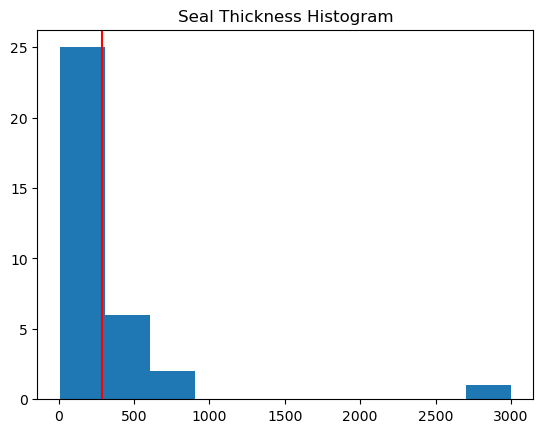

In [217]:
plt.hist(miocic['Seal thickness'])
plt.axvline(miocic['Seal thickness'].median(), c='red')
plt.title('Seal Thickness Histogram');

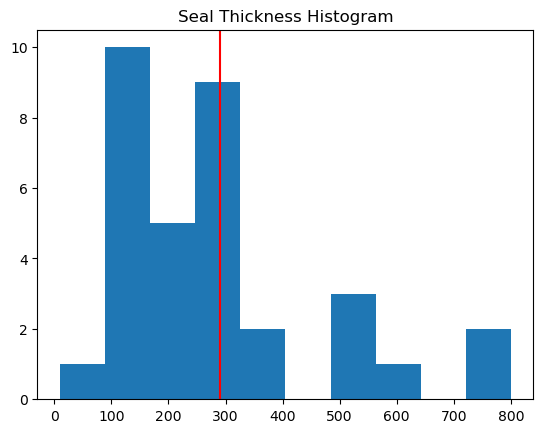

In [218]:
plt.hist(miocic[miocic['Seal thickness']<1000]['Seal thickness'])
plt.axvline(miocic['Seal thickness'].median(), c='red')
plt.title('Seal Thickness Histogram');

### Test for Normality

In [219]:
shapiro(miocic['Seal thickness'], nan_policy='omit')

ShapiroResult(statistic=0.47789457963739446, pvalue=7.274261654415464e-10)

In [220]:
shapiro(miocic[miocic['Seal thickness']<1000]['Seal thickness'], nan_policy='omit')

ShapiroResult(statistic=0.8760742688764024, pvalue=0.0013498477592681717)

Since 'Seal Thickness' does not follow a normal distribution, I will interpolate using K Nearest Neighbors, not the mean or median.

## Reservoir thickness (Gross)

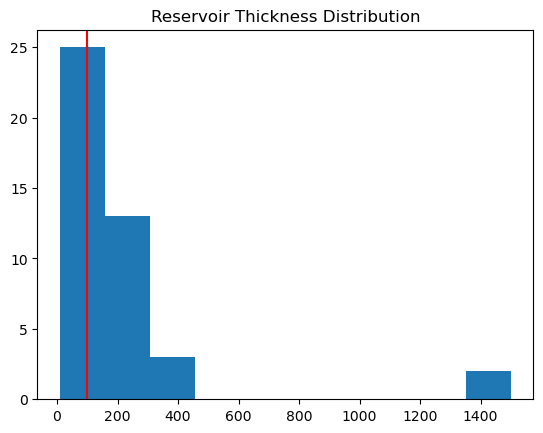

In [221]:
plt.hist(miocic['Reservoir thickness (Gross)'])
plt.axvline(miocic['Reservoir thickness (Gross)'].median(), c='red')
plt.title('Reservoir Thickness Distribution');

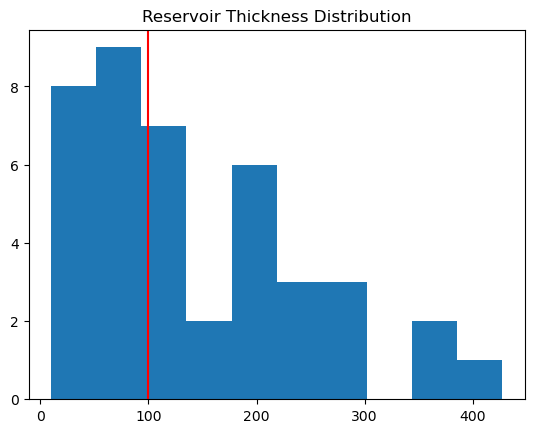

In [222]:
plt.hist(miocic[miocic['Reservoir thickness (Gross)']< 1200]['Reservoir thickness (Gross)'])
plt.axvline(miocic['Reservoir thickness (Gross)'].median(), c='red')
plt.title('Reservoir Thickness Distribution');

### Test for Normality

In [223]:
shapiro(miocic['Reservoir thickness (Gross)'], nan_policy='omit')

ShapiroResult(statistic=0.5189388083345232, pvalue=1.1252418329596726e-10)

In [224]:
shapiro(miocic[miocic['Reservoir thickness (Gross)']< 1200]['Reservoir thickness (Gross)'], nan_policy='omit')

ShapiroResult(statistic=0.9092809758049046, pvalue=0.003152220236947313)

Since 'Reservoir thickness (Gross)' does not follow a normal distribution, I will interpolate using K Nearest Neighbors, not the mean or median.

## Temperature

In [226]:
shapiro(miocic['Temperature'], nan_policy='omit')

ShapiroResult(statistic=0.9649785839043623, pvalue=0.09231922459800347)

We cannot determine that the temperature does not follow a normal distribution.

# Interpolate Missing Data

In [225]:
miocic.columns

Index(['Densities', 'Leakage', 'Reservoir thickness (Gross)', 'Seal thickness',
       'Offshore', 'Depth', 'Temperature', 'Pressure', 'Trapmech_structural',
       'Trapmech_stratigraphic', 'Structural_fault', 'Structural_anticline',
       'Faultbound_yes', 'Faultbound_nan', 'Res_sandstone', 'Res_carbonates',
       'Res_other', 'Carbonate_limestone', 'Carbonate_dolomite', 'Seal_shale',
       'Seal_evaporite', 'Seal_other', 'Stacked_yes', 'Stacked_nan'],
      dtype='object')

I interpolate the missing Temperature data using the mean because it could follow a normal distribution.

In [ ]:
imp = 

In [159]:
imputer = KNNImputer(n_neighbors=5)

In [164]:
miocic_imputed= imputer.fit_transform(miocic)

ValueError: could not convert string to float: 'Mudstones'